In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # Replace with load_wine or load_breast_cancer if desired
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [19]:

# Load and prepare the dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [20]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [21]:

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

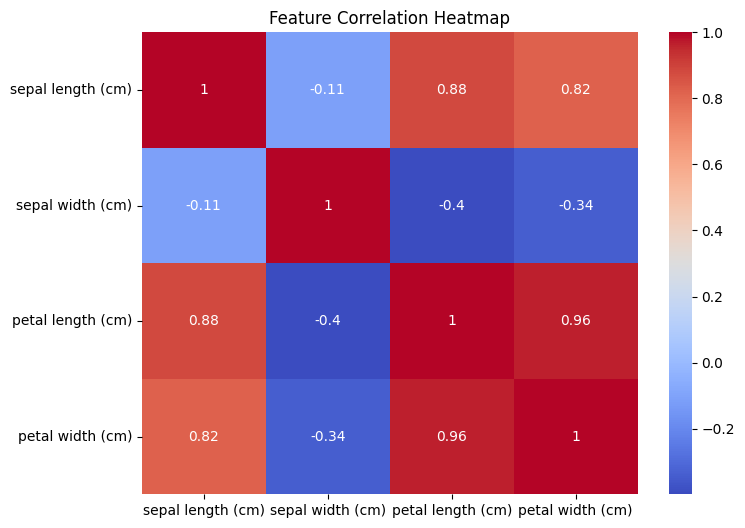

In [22]:

# EDA - Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_train, columns=data.feature_names).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
# k-Nearest Neighbors (kNN) Implementation
from scipy.stats import mode

class kNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for i in range(len(X)):
            distances = np.linalg.norm(self.X_train - X[i], axis=1)
            k_nearest_neighbors = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_neighbors]
            most_common_label = mode(k_nearest_labels, keepdims=True)[0][0]  # Fixing the mode extraction
            predictions.append(most_common_label)
        return np.array(predictions)


In [28]:

# Naive Bayes Implementation
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {c: X[y == c].mean(axis=0) for c in self.classes}
        self.variances = {c: X[y == c].var(axis=0) for c in self.classes}
        self.priors = {c: np.mean(y == c) for c in self.classes}

    def predict(self, X):
        posteriors = []
        for x in X:
            class_probs = {}
            for c in self.classes:
                prior = np.log(self.priors[c])
                class_conditional = np.sum(np.log(self.gaussian_pdf(x, c)))
                class_probs[c] = prior + class_conditional
            posteriors.append(max(class_probs, key=class_probs.get))
        return np.array(posteriors)

    def gaussian_pdf(self, x, c):
        mean = self.means[c]
        variance = self.variances[c]
        numerator = np.exp(- (x - mean) ** 2 / (2 * variance))
        denominator = np.sqrt(2 * np.pi * variance)
        return numerator / denominator

In [29]:

# Initialize, train, and predict with kNN
knn_model = kNN(k=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

# Initialize, train, and predict with Naive Bayes
nb_model = NaiveBayes()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Logistic Regression using scikit-learn
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

In [30]:

# Decision Tree using scikit-learn
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_
dt_preds = best_dt_model.predict(X_test)

In [31]:

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("\n")

In [32]:


# Evaluate each model
evaluate_model(y_test, knn_preds, "k-Nearest Neighbors")
evaluate_model(y_test, nb_preds, "Naive Bayes")
evaluate_model(y_test, log_reg_preds, "Logistic Regression")
evaluate_model(y_test, dt_preds, "Decision Tree")

Model: k-Nearest Neighbors
Accuracy: 0.93, Precision: 0.94, Recall: 0.93, F1 Score: 0.93
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Model: Naive Bayes
Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97    

In [33]:

# Feature Importance for Decision Tree
importances = best_dt_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


<ipython-input-34-3bc5a084d55b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


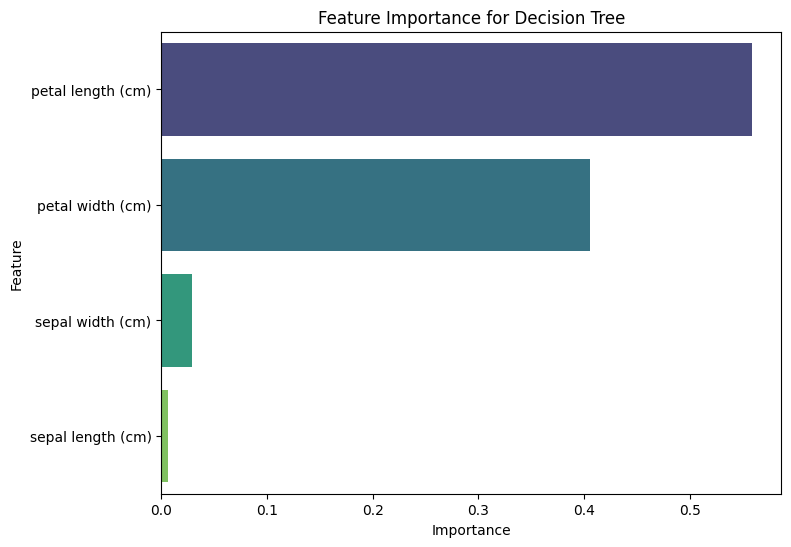

In [34]:

# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Decision Tree")
plt.show()